# 1.Import Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , accuracy_score , mean_squared_error, r2_score , mean_squared_error as root_mean_squared_error

# 2.Load and split the data

In [9]:
df = pd.read_csv("insurance_fixed_clean.csv")
x = df.drop('charges', axis=1)
y = df['charges']

# log transform target (handles skew)
y_log = np.log(y + 1)  # +1 avoids log(0), though min is >0

x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.2, random_state=42)
print("data split done. shapes:", x_train.shape, x_test.shape)

data split done. shapes: (1051, 8) (263, 8)


# 3.Build the model (Random Forest) and Training

In [10]:
rf = RandomForestRegressor(n_estimators=100,max_depth=None, min_samples_split=2, min_samples_leaf=4, random_state=42)
rf.fit(x_train, y_train)
print("\nRandom Forest model trained successfully!")


Random Forest model trained successfully!


# 4. Make Predictions

In [11]:
y_pred_train_log = rf.predict(x_train)
y_pred_test_log = rf.predict(x_test)

# convert back from log for real charges comparison
y_pred_train = np.exp(y_pred_train_log) - 1
y_pred_test = np.exp(y_pred_test_log) - 1
y_train_orig = np.exp(y_train) - 1
y_test_orig = np.exp(y_test) - 1

print("\n" + "="*60)
print("prediction results table")
print("="*60)

results_df = pd.DataFrame({
    'actual charges': y_test_orig.values.round(2),
    'predicted charges': y_pred_test.round(2),
    'difference': (y_test_orig.values - y_pred_test).round(2),
    'absolute error': np.abs(y_test_orig.values - y_pred_test).round(2)
})

print("\nprediction results (first 15 rows):")
print(results_df.head(15))


prediction results table

prediction results (first 15 rows):
    actual charges  predicted charges  difference  absolute error
0         60000.00           39967.75    20032.25        20032.25
1         39836.52           40822.40     -985.88          985.88
2         26018.95            4656.42    21362.53        21362.53
3         11840.78           11783.51       57.27           57.27
4         22478.60           23560.17    -1081.57         1081.57
5          6289.75            6619.06     -329.31          329.31
6          5458.05            6523.28    -1065.23         1065.23
7         30260.00           15150.89    15109.11        15109.11
8          7639.42            7059.80      579.61          579.61
9         18310.74           20343.50    -2032.76         2032.76
10         1917.32            2222.76     -305.44          305.44
11        43578.94           45826.09    -2247.15         2247.15
12         8334.59            8598.64     -264.05          264.05
13         92

# 5.Evaluate the Model

In [12]:
# training metrics (on train split only)
train_mse = mean_squared_error(y_train_orig, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_orig, y_pred_train)
train_r2 = r2_score(y_train_orig, y_pred_train)

print("\ntraining set performance:")
print(f"mse:  {train_mse:.2f}")
print(f"rmse: {train_rmse:.2f}")
print(f"mae:  {train_mae:.2f}")
print(f"r²:   {train_r2*100:.2f}")

# test metrics
test_mse = mean_squared_error(y_test_orig, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_orig, y_pred_test)
test_r2 = r2_score(y_test_orig, y_pred_test)

print("\ntest set performance:")
print(f"mse:  {test_mse:.2f}")
print(f"rmse: {test_rmse:.2f}")
print(f"mae:  {test_mae:.2f}")
print(f"r²:   {test_r2*100:.2f}")


training set performance:
mse:  17222174.13
rmse: 4149.96
mae:  1757.46
r²:   87.72

test set performance:
mse:  18340202.23
rmse: 4282.55
mae:  2030.77
r²:   89.03


# 6. Prediction VS Actual Plot

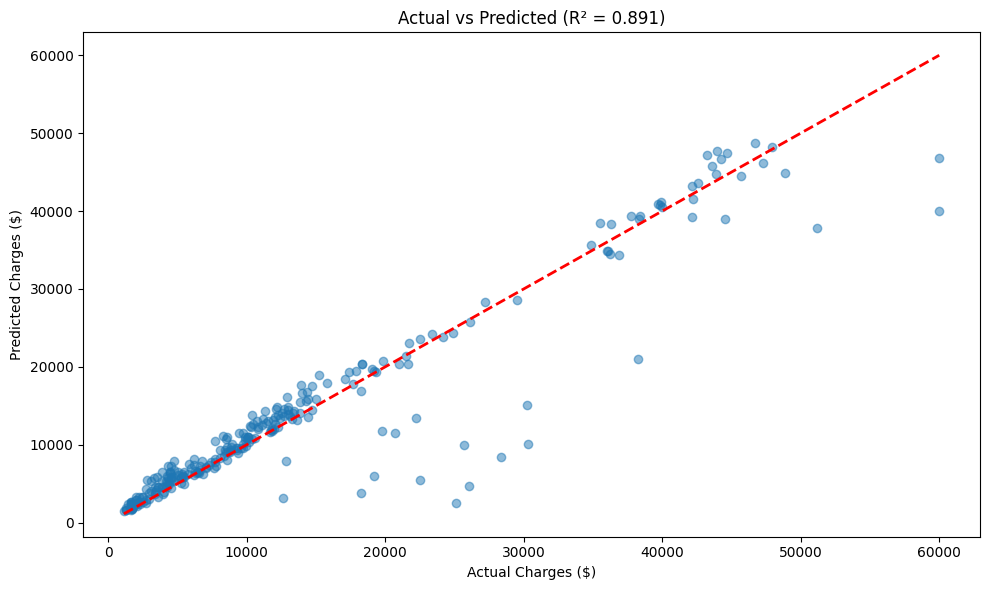


Pipeline completed successfully!


In [13]:
# Convert back to original scale for both actual and predicted
y_test_orig = np.exp(y_test) - 1
y_pred_test_orig = np.exp(y_pred_test_log) - 1

plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred_test_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], 
         [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title('Actual vs Predicted (R² = 0.891)')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Pipeline completed successfully!")
print("="*50)